### Pokemon Project Feedback :

Make a list of the problems and issues you had with the Pokemon prject. Do it in the Markdown format in the same cell here and make sure the list is clean and explanatory !

# Sleep data :

## Part 1: warm up !

### Download and import data from: 

    https://www.dropbox.com/s/mtwl4nyo3lp00gy/sleepdata.csv?dl=0


In [339]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from datetime import datetime
from dateutil import parser
sleepdata = pd.read_csv("sleepdata.csv", delimiter=";", parse_dates=True)
print(sleepdata.columns)
df = sleepdata[['Start', 'End', 'Sleep quality', 'Time in bed', 'Activity (steps)']].copy() 
#renaming df columns to make our lives easier
df.rename(index=str, columns={"Start": "start", "End": "end"}, inplace=True)
df.rename(index=str, columns={"Sleep quality": "sleep_quality", "Time in bed": "time_in_bed"}, inplace=True)
df.rename(index=str, columns={"Activity (steps)": "steps"}, inplace=True)
df.head()

Index(['Start', 'End', 'Sleep quality', 'Time in bed', 'Wake up',
       'Sleep Notes', 'Heart rate', 'Activity (steps)'],
      dtype='object')


,start,end,sleep_quality,time_in_bed,steps
0,2011-06-19 08:42:08,2011-06-19 13:22:13,51%,4:40,0
1,2011-06-29 07:27:53,2011-06-29 12:39:43,57%,5:11,0
2,2011-06-30 08:04:06,2011-06-30 10:51:15,34%,2:47,0
3,2011-07-04 05:48:35,2011-07-04 12:27:00,73%,6:38,0
4,2011-07-05 05:46:29,2011-07-05 10:42:00,51%,4:55,0


In [340]:
print(type(df.start[0]))

df.start = df.start.apply(parser.parse)
df.end = df.end.apply(parser.parse)
df.time_in_bed = df.time_in_bed.apply(parser.parse)
df.head()

print(type(df.start[0]))

#I added those lines because the parse_dates = True from pandas did not work. I got strings instead. 
#The outputs of the prints in this cell confirm that.

<class 'str'>
<class 'pandas._libs.tslib.Timestamp'>


### Bedtime Hours:

What is  most common hours? You can make a histogram of bedtime hour 

In [341]:
#For creating a histogram of hours, we need to convert our object to numbers
#Plot will not take timestamp, or timestamp.time to create histograms directly

start_hour = []
dir(df.start[0])
df.start[0].hour
for starting_hour in df.start:
    hours = starting_hour.hour
    minutes = starting_hour.minute
    seconds = starting_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    start_hour.append(time_in_hours) #add that to the list start_hour
    
end_hour = []
dir(df.end[0])
df.end[0].hour
for ending_hour in df.start:
    hours = ending_hour.hour
    minutes = ending_hour.minute
    seconds = ending_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    end_hour.append(time_in_hours) #add that to the list start_hour


In [342]:
start_hour = np.asarray(start_hour)
end_hour = np.asarray(end_hour)
df['start_hours'] = start_hour
df['end_hours'] = end_hour

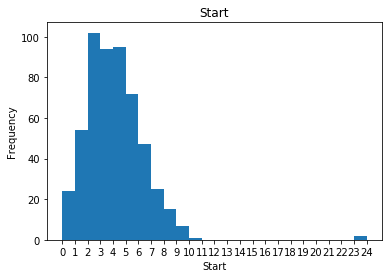

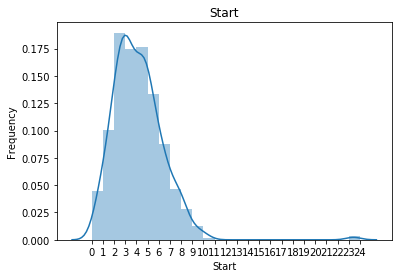

In [343]:
hour_intervals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
plt.hist(df.start_hours, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Start")
plt.ylabel("Frequency")
plt.title("Start")
plt.show()

sb.distplot(df.start_hours, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Start")
plt.ylabel("Frequency")
plt.title("Start")
plt.show()

### Conclusion ?

What does the plot show about the sleep pattern ?

Clearly, I should be sleeping earlier. According to this graph, the most common hour I fall asleep is 2 in the morning. However, I should be mindful of bias since I am less likely to initialize the Sleep Cycle app when I’m super tired - as is often the case when I fall asleep before midnight.

### Sleep Duration:

How long slept for when fell asleep. 

Can plot a histogram based on minutes of sleep

In [344]:
time_bed = []
for time in df.time_in_bed:
    hours = time.hour
    minutes = time.minute
    seconds = time.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_min = time_in_seconds/60. #convert back to min + fraction min
    time_bed.append(time_in_min) #add that to the list time_bed
 
time_bed = np.asarray(time_bed)
df['time_bed'] = time_bed

#![title](img/2.png)

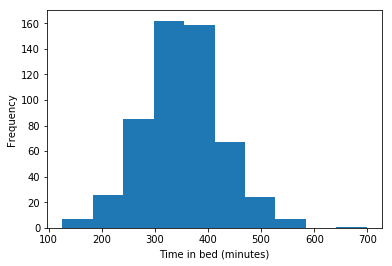

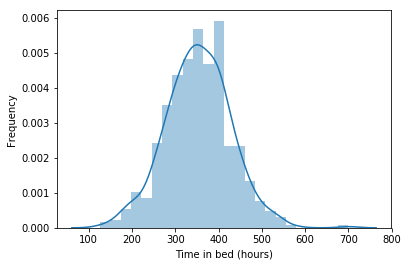

353.2100371747212


In [345]:
plt.hist(df.time_bed)
plt.xlabel("Time in bed (minutes)")
plt.ylabel("Frequency")
plt.show()

sb.distplot(df.time_bed)
plt.xlabel("Time in bed (hours)")
plt.ylabel("Frequency")
plt.show()

print(df.time_bed.mean())

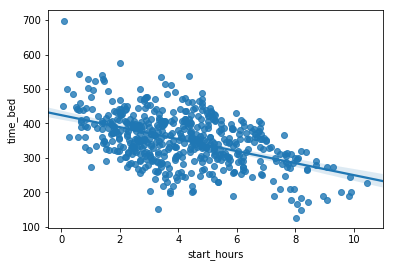

In [346]:
#How long you slept versus time to sleep#
sb.regplot(df.start_hours[df.start_hours < 20], df.time_bed[df.start_hours < 20]) 
#excluding outliers for the regression
#sb.regplot(df.start_hours, df.time_bed)
plt.show()

### Conclusion ?

An approximately normal distribution as expected with the large sample size. On average, I slept about 355 minutes, or 5 hours and 55 minutes per night. Take note that the mean is pulled up by an outlier, the result of a 12 hour hibernation on a warm summer night last year.

### Sleep Duration Over Time:

How has the duration of changed over time ?

__Note that you might want to fit a regression curve to the scatter plot you make !__

__Now modify your plot to include sleep quality as a new dimension !__

In [347]:
index = []
for time in df.start:
    index.append(pd.to_datetime(time.date()))
df['index'] = index
df.set_index('index', inplace=True)

print(type(df.index))
#![title](img/3.png)
#df.time_bed.plot()
#plt.show()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


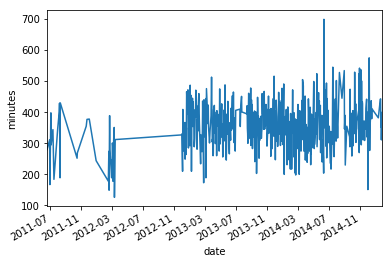

In [348]:
df.time_bed.plot()
plt.ylabel("minutes")
plt.xlabel("date")
plt.show()

In [349]:
df.sleep_quality = df.sleep_quality.apply(lambda x: x.strip('%')) #to remove the percentage
df.sleep_quality = df.sleep_quality.apply(lambda x: pd.to_numeric(x)) #converts x from str to numeric
df.head()

#Making Sleep quality just a number from 0 to 100, in preparation for the next plots

,start,end,sleep_quality,time_in_bed,steps,start_hours,end_hours,time_bed
index,,,,,,,,
2011-06-19,2011-06-19 08:42:08,2011-06-19 13:22:13,51,2018-04-12 04:40:00,0,8.702222,8.702222,280.0
2011-06-29,2011-06-29 07:27:53,2011-06-29 12:39:43,57,2018-04-12 05:11:00,0,7.464722,7.464722,311.0
2011-06-30,2011-06-30 08:04:06,2011-06-30 10:51:15,34,2018-04-12 02:47:00,0,8.068333,8.068333,167.0
2011-07-04,2011-07-04 05:48:35,2011-07-04 12:27:00,73,2018-04-12 06:38:00,0,5.809722,5.809722,398.0
2011-07-05,2011-07-05 05:46:29,2011-07-05 10:42:00,51,2018-04-12 04:55:00,0,5.774722,5.774722,295.0


### Conclusion ?

Can you notice any change around August 2013 ?

Smaller fluctuations...?


### Sleep Quality Over Time:

Sleep Quality is affected by two factors:

    - Total time asleep
    - Amount of movement


Since we don’t have access to the movement data, we can’t verify the relationship between movement and sleep quality. 

However, we can check the relationship between sleep duration and sleep quality. Create a visualization of that !

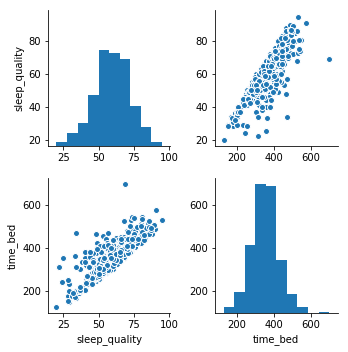

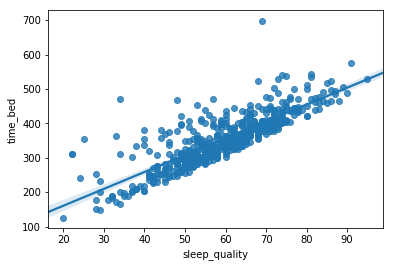

(0.82765132535396735, 1.4577531979872491e-136)

In [350]:
sb.pairplot(df[['sleep_quality', 'time_bed']])
plt.show()

sb.regplot(df.sleep_quality, df.time_bed)
plt.show()

stats.pearsonr(df.sleep_quality, df.time_bed)



### Does duration mean quality ?

Given this information, it is possible for sleep quality to increase even when sleep duration decreases, especially if there is less movement in bed ! S


 plot sleep quality over time to find out if this is true !

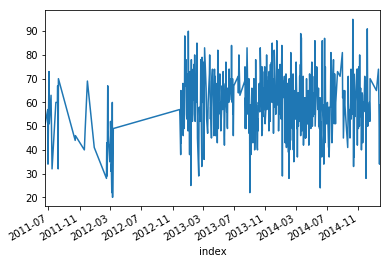

In [351]:
df.sleep_quality.plot()
plt.show()








# Exercise Data part


In [376]:
exercisedf = pd.read_csv("Exercise_data.csv", delimiter=",", parse_dates=True)

#converting time_offset to hours
exercisedf.time_offset = exercisedf.time_offset/(3600*1000)
exercisedf.head(3)

exercisedf.columns

#lets add just the columns that matter for us

cols = ['time_offset', 'start_time', 'end_time', 'duration', 'calorie', 'distance','max_speed']

#The columns involving heart rate have way too many missing points, so I am ignoring them
#We can still sort of quantify the intensity of exercises based on variables like:
#duration; calories consumed; distance.
#Max speed os not perfect, but has only a few NA's, so we can replace them with the median/mean

exdf = exercisedf[cols]
exdf.head()

,time_offset,start_time,end_time,duration,calorie,distance,max_speed
0,-7.0,2016-06-25 10:28:30.517,2016-06-25 10:34:00.642,329211,66.0,820.0,2.492401
1,-7.0,2016-09-24 18:22:47.097,2016-09-24 19:13:43.659,996676,105.0,910.0,1.684247
2,-7.0,2016-09-27 20:21:42.571,2016-09-27 21:04:05.302,2457643,408.0,4910.0,3.024856
3,-7.0,2016-09-30 21:29:56.624,2016-09-30 23:42:10.952,1946000,459.0,5510.0,4.415482
4,-5.0,2017-03-06 10:05:28.618,2017-03-06 10:22:41.693,1018602,230.0,2950.0,3.082483


In [377]:
#let's replace the index column for the exercise dataset by dates
#This is in preparation to what's to come
#The dates are the ones indicated in start_time


exdf.start_time = exdf.start_time.apply(parser.parse)
exdf.end_time = exdf.end_time.apply(parser.parse)

index = []
for time in exdf.start_time:
     index.append(pd.to_datetime(time.date()))
exdf['index'] = index
exdf.set_index('index', inplace=True)

exdf.max_speed.fillna(exdf.max_speed.median(), inplace=True)
exdf.distance.fillna(exdf.distance.median(), inplace=True)

#Convert duration to minutes

exdf.duration = exdf.duration/60000


start_hour = []
for starting_hour in exdf.start_time:
    hours = starting_hour.hour
    minutes = starting_hour.minute
    seconds = starting_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    start_hour.append(time_in_hours) #add that to the list start_hour
    
end_hour = []
for ending_hour in exdf.end_time:
    hours = ending_hour.hour
    minutes = ending_hour.minute
    seconds = ending_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    end_hour.append(time_in_hours) #add that to the list start_hour
    
start_hour = np.asarray(start_hour)
end_hour = np.asarray(end_hour)
exdf['start_hour'] = start_hour #+ exdf.time_offset
exdf['end_hour'] = end_hour #+ exdf.time_offset  #accounting for the time offset?

#I was adding time_offset but that led to unreasonable times for when the person is exercising
#So I think that the offset is being taken into account automatically...

exdf['start_hour'] = start_hour 
exdf['end_hour'] = end_hour 

exdf['start_hour'] = exdf['start_hour']%24
exdf['end_hour'] = exdf['end_hour']%24


/Users/hudsonps/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/hudsonps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/hudsonps/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

# Lets check when the guy usually starts exercising.

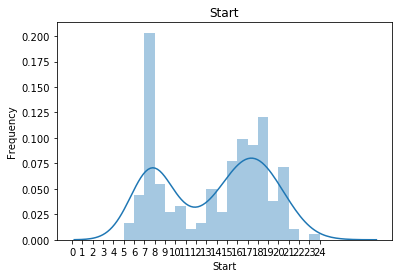

In [378]:
hour_intervals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
#plt.hist(exdf.start_hour, bins=hour_intervals)
#plt.xticks(hour_intervals)
#plt.xlabel("Start")
#plt.ylabel("Frequency")
#plt.title("Start")
#plt.show()

sb.distplot(exdf.start_hour, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Start")
plt.ylabel("Frequency")
plt.title("Start")
plt.show()

# How about exercise duration?

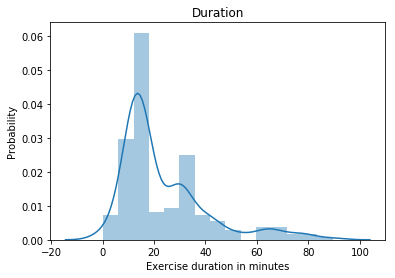

In [379]:
sb.distplot(exdf.duration) 
#duration is expressed in miliseconds, so I am converting it to minutes for the plot
plt.xlabel("Exercise duration in minutes")
plt.ylabel("Probability")
plt.title("Duration")
plt.show()

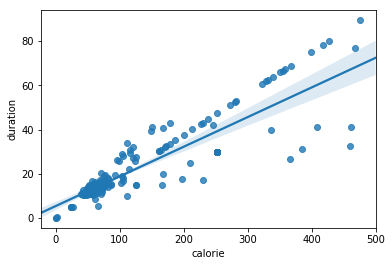

(0.88170835356997368, 1.2684405457674831e-60)


In [380]:
#Correlation between calories spent and duration

from scipy import stats

x = exdf.calorie
y = exdf.duration

sb.regplot(x,y)
plt.show()

print(stats.pearsonr(x, y))

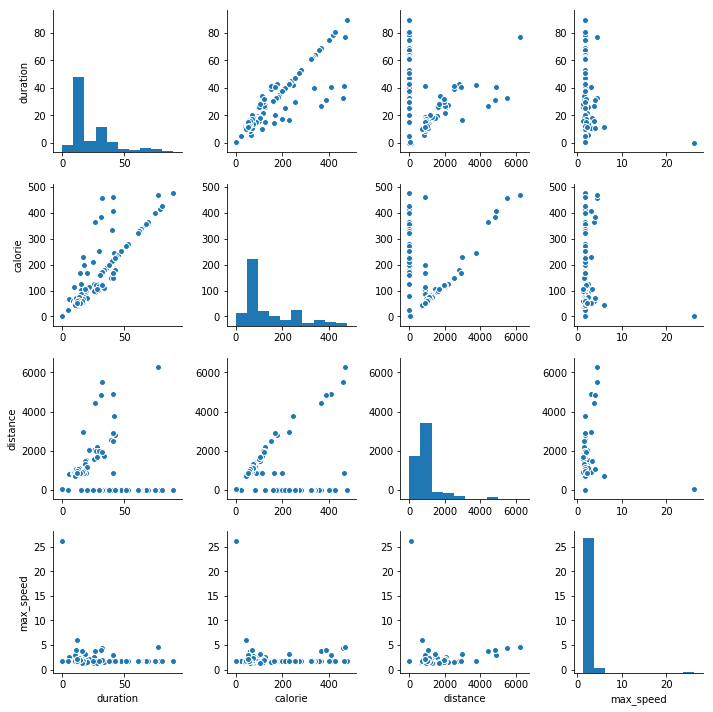

In [381]:
sb.pairplot(exdf[['duration', 'calorie', 'distance', 'max_speed']])
plt.show()

#We will keep calories and duration as our indication of how much exercise

## Part 2: A similar realistic situation:

- Lets conisder a similar where we have got sleep data from a devices. Expand on what you did above and come with extra analysis of yours. Make conclusions based on your observations

- ownload the data: https://www.dropbox.com/s/7fdmc0l3410g8hu/sleep-export2.csv?dl=0

- Here are some extra info you might need:
     - http://developer.samsung.com/health/server/api/data-types/sleep
     - http://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.Sleep.html

    - https://currentmillis.com/tutorials/system-currentTimeMillis.html#utc

In [384]:
realdf = pd.read_csv("sleep-export2.csv", delimiter=",", parse_dates=True)

realdf.drop(['pkg_name', 'datauuid', 'deviceuuid', 'custom', 'comment'], axis=1, inplace=True)

#converting time_offset to hours
realdf.time_offset = realdf.time_offset/(3600*1000)

#
realdf.start_time = realdf.start_time.apply(parser.parse)
realdf.end_time = realdf.end_time.apply(parser.parse)
realdf.update_time = realdf.update_time.apply(parser.parse)
realdf.create_time = realdf.create_time.apply(parser.parse)


#To make it easy to plot histograms
start_hour = []
for starting_hour in realdf.start_time:
    hours = starting_hour.hour
    minutes = starting_hour.minute
    seconds = starting_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    start_hour.append(time_in_hours) #add that to the list start_hour
    
end_hour = []
for ending_hour in realdf.end_time:
    hours = ending_hour.hour
    minutes = ending_hour.minute
    seconds = ending_hour.second
    time_in_seconds = hours*3600. + minutes*60. + seconds #convert all to seconds
    time_in_hours = time_in_seconds/3600. #convert back to hours + fraction of hour
    end_hour.append(time_in_hours) #add that to the list start_hour    
    
realdf['start_hour'] = start_hour #+ realdf['time_offset']   
realdf['end_hour'] =  end_hour #+ realdf['time_offset']

realdf['duration'] = realdf['end_hour'] - realdf['start_hour']

#the calculation above may lead to negative hours.
#Negative hours may be made normal by the replacement hour -> hour%24

realdf['start_hour'] = realdf['start_hour']%24
realdf['end_hour'] = realdf['end_hour']%24
realdf['duration'] = realdf['duration']%24

index = []
for time in realdf.start_time:
    index.append(pd.to_datetime(time.date()))
realdf['index'] = index
realdf.set_index('index', inplace=True)


In [385]:
realdf.head(3)

,time_offset,end_time,start_time,update_time,create_time,start_hour,end_hour,duration
index,,,,,,,,
2017-12-16,-5.0,2017-12-16 06:53:00,2017-12-16 00:02:00,2017-12-16 07:08:04.768,2017-12-16 07:08:04.768,0.033333,6.883333,6.850000
2017-12-17,-5.0,2017-12-18 06:42:00,2017-12-17 22:31:00,2017-12-18 06:57:19.246,2017-12-18 06:57:19.246,22.516667,6.700000,8.183333
2017-12-19,-5.0,2017-12-20 03:48:00,2017-12-19 22:55:00,2017-12-20 03:57:23.977,2017-12-20 03:57:23.977,22.916667,3.800000,4.883333


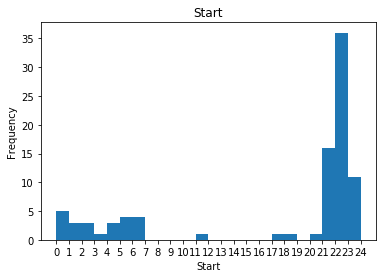

In [387]:
hour_intervals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24]
plt.hist(realdf.start_hour, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Start")
plt.ylabel("Frequency")
plt.title("Start")
plt.show()

#sb.distplot(realdf.start_hour, bins=hour_intervals)
#plt.xticks(hour_intervals)
#plt.xlabel("Start")
#plt.ylabel("Frequency")
#plt.title("Start")
#plt.show()

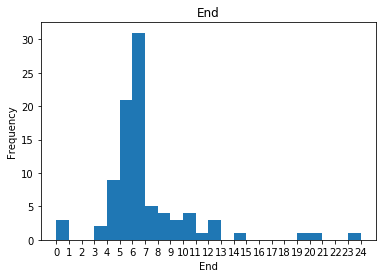

In [388]:
hour_intervals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24]
plt.hist(realdf.end_hour, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("End")
plt.ylabel("Frequency")
plt.title("End")
plt.show()

#sb.distplot(realdf.end_hour, bins=hour_intervals)
#plt.xticks(hour_intervals)
#plt.xlabel("End")
#plt.ylabel("Frequency")
#plt.title("End")
#plt.show()

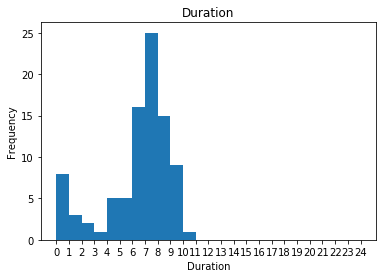

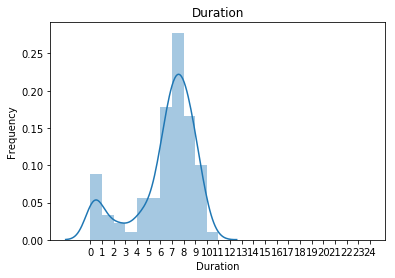

In [390]:
hour_intervals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23, 24]
plt.hist(realdf.duration, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Duration")
plt.show()

sb.distplot(realdf.duration, bins=hour_intervals)
plt.xticks(hour_intervals)
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.title("Duration")
plt.show()

#The person seems to sleep on average 7-9 hours a day, thankfully

## Part 3: A messy realistic situation:

- Lets conisder a more realistic situation where we have got sleep data from two different devices but off the same source !

- The data is not clean. It has missing records; The format is different;

- The goal here is to develop a script that cleans up and puts the data in a format we can easily use. So, we need to make sense of the data and also clean it up for analysis...

- Download the data here : https://www.dropbox.com/s/o6mbznc047z1pxs/sleep-export.csv?dl=0

In [405]:
messydf = pd.read_csv("sleep-export.csv")
messydf.head(3)

,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,...,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Unnamed: 257,Unnamed: 258,Unnamed: 259
0,1.52E+12,18. 03. 2016 23:21,8.59,0,NaN,10005,6780,0.08767594,9,0.34951457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Id,Sched,Hours,Rating,Comment,Framerate,Snore,Noise,Cycles,DeepSleep,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
print(messydf.columns)

Index(['Id', 'Sched', 'Hours', 'Rating', 'Comment', 'Framerate', 'Snore',
       'Noise', 'Cycles', 'DeepSleep',
       ...
       'Unnamed: 250', 'Unnamed: 251', 'Unnamed: 252', 'Unnamed: 253',
       'Unnamed: 254', 'Unnamed: 255', 'Unnamed: 256', 'Unnamed: 257',
       'Unnamed: 258', 'Unnamed: 259'],
      dtype='object', length=260)


In [407]:
#We define a tidydf where we will have a more organized version of the data

tidydf = messydf[['Sched']].copy()

In [408]:
tidydf.Sched = tidydf.Sched[tidydf.Sched != "Sched"] #drop sched
tidydf.dropna(inplace=True) #drop NA

In [409]:
tidydf.Sched
tidydf.Sched = tidydf.Sched.apply(pd.to_datetime) #make it a datetime type

In [410]:
tidydf['hours'] = messydf.Hours.copy()
tidydf['rating'] = messydf.Rating.copy()
tidydf['snore'] = messydf.Snore.copy()
tidydf['noise'] = messydf.Noise.copy()
tidydf['cycles'] = messydf.Cycles.copy()
tidydf['deep_sleep'] = messydf.DeepSleep.copy()
tidydf['lenadjust'] = messydf.LenAdjust.copy()
tidydf['geo'] = messydf.Geo.dropna()[messydf.Geo != 'Geo'].values

index = []
for time in tidydf.Sched:
     index.append(pd.to_datetime(time.date()))
tidydf['index'] = index
tidydf.set_index('index', inplace=True)

tidydf.hours = tidydf.hours.astype(float)
tidydf.snore = tidydf.snore.astype(float)
tidydf.cycles = tidydf.cycles.astype(float)
tidydf.deep_sleep = tidydf.deep_sleep.astype(float)
tidydf.rating = tidydf.rating.astype(float)

In [411]:
tidydf.head(3)

,Sched,hours,rating,snore,noise,cycles,deep_sleep,lenadjust,geo
index,,,,,,,,,
2016-03-18,2016-03-18 23:21:00,8.59,0.00,6780.0,0.08767594,9.0,0.349515,-5,273.51273
2016-03-16,2016-03-16 00:37:00,7.79,3.25,2040.0,0.05374627,6.0,0.454545,-36,3378.4058
2016-03-15,2016-03-15 00:35:00,6.67,3.00,6300.0,0.029171253,4.0,0.455696,-10,359.99258


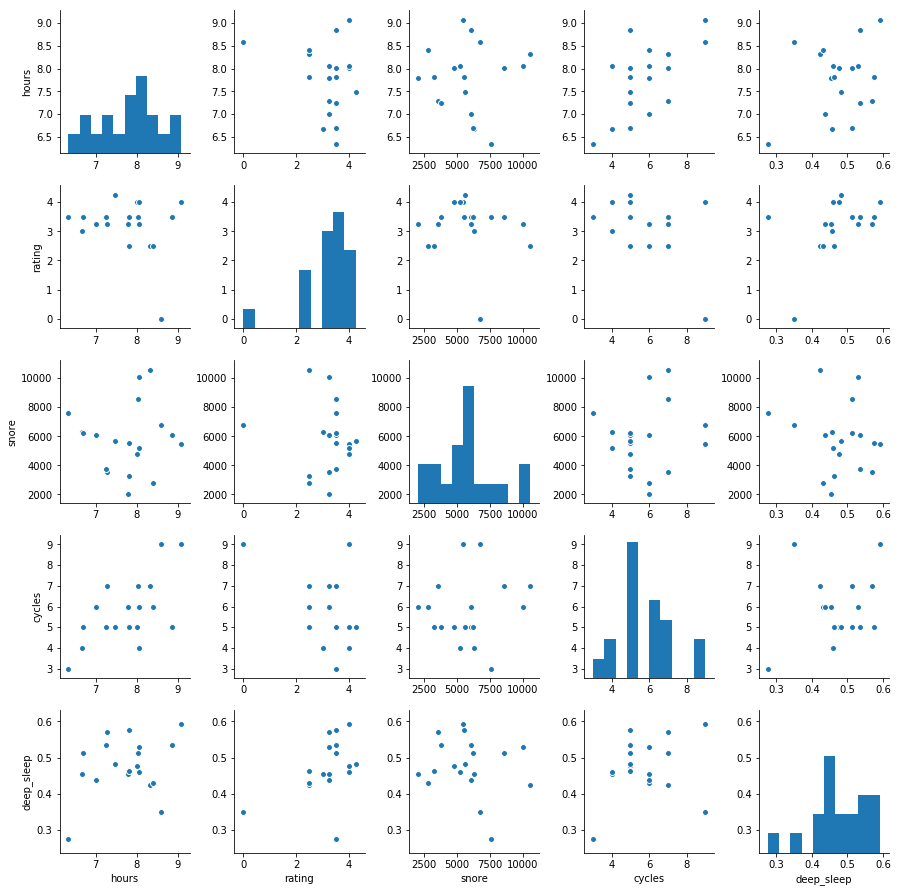

In [413]:
sb.pairplot(tidydf[['hours', 'rating', 'snore', 'cycles', 'deep_sleep']])
plt.show()

#To the naked eye the only correlation I clearly can notice is the one between 
#hours and numbers of cycles. 

In [414]:
numeric_cols = ['hours', 'rating', 'snore', 'cycles', 'deep_sleep']

for x in numeric_cols:
    for y in numeric_cols:
        a = tidydf[x]
        b = tidydf[y]
        pearson = stats.pearsonr(a, b)
        if(pearson[1] < 0.05):
            if(x != y):
                print(x, y)
                print(pearson)
            
            

hours cycles
(0.61937099840087706, 0.0046839722176429312)
rating cycles
(-0.46433560803730056, 0.045197843204481794)
rating deep_sleep
(0.47038864931936514, 0.042107129640818378)
cycles hours
(0.61937099840087706, 0.0046839722176429312)
cycles rating
(-0.46433560803730056, 0.045197843204481794)
deep_sleep rating
(0.47038864931936514, 0.042107129640818378)


In [301]:
stats.pearsonr(tidydf.hours, tidydf.cycles)[1]

0.0046839722176429312

In [302]:
#Seems like deep_sleeping might be linked to the person's rating
#Same for number of cycles.

#It is a bit strange that cycles seem to be anti-correlated with rating

#I guess that suggests that indeed this small sample cannot be trusted much
#even when p is small

# Exercise + Sleep Data Part

In [313]:
#It has been brought to my attention that maybe we should be looking at the slightly messy
#sleep data.
#I originally ignored that one because there seemed to be no information about sleep quality

#But that is because I did the first part of the project a few weeks ago and had forgotten that
#the first part was showing a clear correlation between sleep quality and duration

#So we can analyze if duration correlates to exercises.

In [418]:
exdf.head(4)

,time_offset,start_time,end_time,duration,calorie,distance,max_speed,start_hour,end_hour
index,,,,,,,,,
2016-06-25,-7.0,2016-06-25 10:28:30.517,2016-06-25 10:34:00.642,5.486850,66.0,820.0,2.492401,10.475000,10.566667
2016-09-24,-7.0,2016-09-24 18:22:47.097,2016-09-24 19:13:43.659,16.611267,105.0,910.0,1.684247,18.379722,19.228611
2016-09-27,-7.0,2016-09-27 20:21:42.571,2016-09-27 21:04:05.302,40.960717,408.0,4910.0,3.024856,20.361667,21.068056
2016-09-30,-7.0,2016-09-30 21:29:56.624,2016-09-30 23:42:10.952,32.433333,459.0,5510.0,4.415482,21.498889,23.702778


In [419]:
realdf.head(4)

,time_offset,end_time,start_time,update_time,create_time,start_hour,end_hour,duration
index,,,,,,,,
2017-12-16,-5.0,2017-12-16 06:53:00,2017-12-16 00:02:00,2017-12-16 07:08:04.768,2017-12-16 07:08:04.768,0.033333,6.883333,6.850000
2017-12-17,-5.0,2017-12-18 06:42:00,2017-12-17 22:31:00,2017-12-18 06:57:19.246,2017-12-18 06:57:19.246,22.516667,6.700000,8.183333
2017-12-19,-5.0,2017-12-20 03:48:00,2017-12-19 22:55:00,2017-12-20 03:57:23.977,2017-12-20 03:57:23.977,22.916667,3.800000,4.883333
2017-12-22,-8.0,2017-12-22 12:18:00,2017-12-22 03:57:00,2017-12-22 12:33:23.295,2017-12-22 12:33:23.295,3.950000,12.300000,8.350000


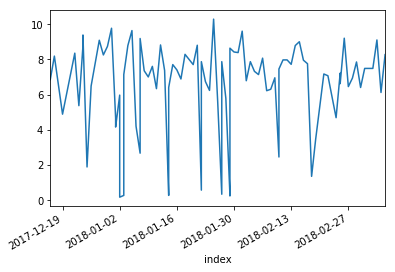

In [317]:
(realdf.duration).plot()
plt.show()

In [318]:
#The data above starts in 2017 - 12
#Lets simplify our exercise data by focusing on this region

exdf.columns

Index(['time_offset', 'start_time', 'end_time', 'duration', 'calorie',
       'distance', 'max_speed', 'start_hour', 'end_hour'],
      dtype='object')

In [420]:
exdfuseful = exdf[exdf['start_time'] > datetime(2017, 12, 15)]

In [421]:
#Another complication: lots of repeated indices for exdfuseful. Lets us groupby
#We sum the calories and duration, since we care about the total amount of exercise per day
#exdf.head()

ex = exdfuseful.groupby(exdfuseful.index).sum()

In [422]:
#I will make the same simplification for realdf
realdf.index.duplicated()
re = realdf.groupby(realdf.index).sum()
re.head()


,time_offset,start_hour,end_hour,duration
index,,,,
2017-12-16,-5.0,0.033333,6.883333,6.850000
2017-12-17,-5.0,22.516667,6.700000,8.183333
2017-12-19,-5.0,22.916667,3.800000,4.883333
2017-12-22,-8.0,3.950000,12.300000,8.350000
2017-12-23,-8.0,4.800000,10.166667,5.366667


In [424]:

ex.head()

,time_offset,duration,calorie,distance,max_speed,start_hour,end_hour
index,,,,,,,
2017-12-17,-5.0,8.690933,60.836,872.46,1.722222,16.490278,16.635278
2017-12-18,-10.0,25.682383,113.670,1684.15,3.143949,24.588056,25.016111
2017-12-19,-5.0,30.272167,160.901,0.00,1.722222,15.107222,15.616389
2017-12-20,-24.0,38.262733,140.400,2205.44,4.359971,48.685556,49.323333
2017-12-21,-8.0,5.200200,27.645,0.00,1.722222,19.414167,19.501667


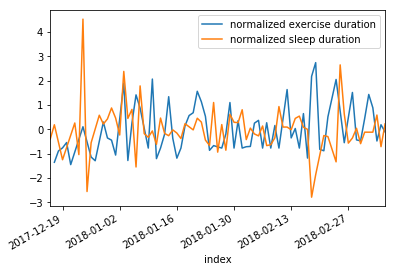

In [432]:
#Lets normalize sleep duration and exercise duration so as to compare them

from sklearn import preprocessing

ex['norm_ex_duration'] = preprocessing.scale(ex.duration)
ex['norm_calorie'] = preprocessing.scale(ex.calorie)
re['norm_sleep_duration'] = preprocessing.scale(re.duration)


ex.norm_ex_duration.plot(label="normalized exercise duration")
re.norm_sleep_duration.plot(label="normalized sleep duration")
plt.legend()
plt.show()

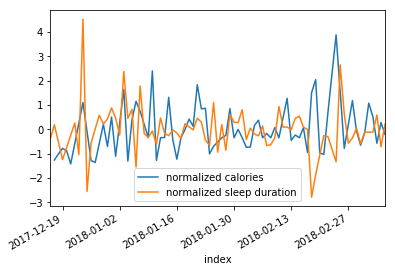

In [446]:
ex.norm_calorie.plot(label="normalized calories")
re.norm_sleep_duration.plot(label="normalized sleep duration")
plt.legend()
plt.show()

In [447]:
#Time to extrat the correlations explicity.
ex.columns

Index(['time_offset', 'calorie', 'distance', 'max_speed', 'start_hour',
       'end_hour', 'norm_ex_duration', 'norm_calorie', 'exercise_duration'],
      dtype='object')

In [448]:
re.columns

Index(['time_offset', 'start_hour', 'end_hour', 'norm_sleep_duration',
       'sleep_duration'],
      dtype='object')

In [438]:
ex['exercise_duration'] = ex.duration
del ex['duration']

AttributeError: 'DataFrame' object has no attribute 'duration'

In [439]:
re['sleep_duration'] = re['duration']
del re['duration']
re.head()

,time_offset,start_hour,end_hour,norm_sleep_duration,sleep_duration
index,,,,,
2017-12-16,-5.0,0.033333,6.883333,-0.392988,6.850000
2017-12-17,-5.0,22.516667,6.700000,0.187640,8.183333
2017-12-19,-5.0,22.916667,3.800000,-1.249415,4.883333
2017-12-22,-8.0,3.950000,12.300000,0.260218,8.350000
2017-12-23,-8.0,4.800000,10.166667,-1.038937,5.366667


In [440]:
re_and_ex = pd.merge(re, ex, left_index=True, right_index=True)

In [441]:
re_and_ex.head()

,time_offset_x,start_hour_x,end_hour_x,norm_sleep_duration,sleep_duration,time_offset_y,calorie,distance,max_speed,start_hour_y,end_hour_y,norm_ex_duration,norm_calorie,exercise_duration
index,,,,,,,,,,,,,,
2017-12-17,-5.0,22.516667,6.700000,0.187640,8.183333,-5.0,60.836,872.460,1.722222,16.490278,16.635278,-1.354415,-1.262193,8.690933
2017-12-19,-5.0,22.916667,3.800000,-1.249415,4.883333,-5.0,160.901,0.000,1.722222,15.107222,15.616389,-0.762730,-0.782634,30.272167
2017-12-24,-16.0,24.383333,18.533333,4.527835,18.150000,-16.0,553.224,4420.025,5.553222,24.011667,25.089444,0.106150,1.097566,61.963850
2017-12-26,-8.0,5.566667,12.050000,-0.552661,6.483333,-8.0,57.180,987.061,1.474362,14.271389,14.547778,-1.138216,-1.279715,16.576617
2017-12-29,-8.0,4.050000,12.300000,0.216671,8.250000,-16.0,367.376,0.000,3.444444,30.795833,31.948611,0.300798,0.206893,69.063500


In [442]:
re_and_ex.count()

time_offset_x          64
start_hour_x           64
end_hour_x             64
norm_sleep_duration    64
sleep_duration         64
time_offset_y          64
calorie                64
distance               64
max_speed              64
start_hour_y           64
end_hour_y             64
norm_ex_duration       64
norm_calorie           64
exercise_duration      64
dtype: int64

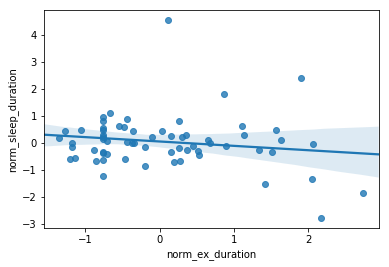

In [443]:
sb.regplot(re_and_ex.norm_ex_duration, re_and_ex.norm_sleep_duration)
plt.show()

In [445]:
print(stats.pearsonr(re_and_ex.norm_calorie, re_and_ex.norm_sleep_duration))
print(stats.pearsonr(re_and_ex.norm_ex_duration, re_and_ex.norm_sleep_duration))

(-0.061849367124053194, 0.62731591113681517)
(-0.16779640685211569, 0.185060709228068)


In [ ]:
#I believe that part of the problem has to do with the fact that
#If the person goes to sleep after midnight, we are counting this as the day after

#So we might need to make changes on our sleep data
#and have something like:
#If the person went to sleep until, say, 5 AM, this should count as the day before
#Since the exercise happened on the day before

#Notice that simply shifting the sleep data day or the exercise day by one won't do


In [472]:
#We will have to essentially reconstruct the datasets.

Dataset reconstruction in the hope of observing correlations

In [475]:
realdf.head(5)

,time_offset,end_time,start_time,update_time,create_time,start_hour,end_hour,duration
index,,,,,,,,
2017-12-16,-5.0,2017-12-16 06:53:00,2017-12-16 00:02:00,2017-12-16 07:08:04.768,2017-12-16 07:08:04.768,0.033333,6.883333,6.850000
2017-12-17,-5.0,2017-12-18 06:42:00,2017-12-17 22:31:00,2017-12-18 06:57:19.246,2017-12-18 06:57:19.246,22.516667,6.700000,8.183333
2017-12-19,-5.0,2017-12-20 03:48:00,2017-12-19 22:55:00,2017-12-20 03:57:23.977,2017-12-20 03:57:23.977,22.916667,3.800000,4.883333
2017-12-22,-8.0,2017-12-22 12:18:00,2017-12-22 03:57:00,2017-12-22 12:33:23.295,2017-12-22 12:33:23.295,3.950000,12.300000,8.350000
2017-12-23,-8.0,2017-12-23 10:10:00,2017-12-23 04:48:00,2017-12-23 10:25:03.272,2017-12-23 10:25:03.272,4.800000,10.166667,5.366667


In [494]:
from datetime import timedelta

#timedelta(days=1) allows us to subtract one day from data

#We will do that if the person sleep past midnight to, say, 6.


In [504]:
s = len(realdf.index)

realdf['index_copy'] = realdf.index

i = 0
for index in realdf.index_copy:
    hour = realdf.start_hour[i]
    if hour > 0 and hour < 6:
        realdf.index_copy[i] = realdf.index_copy[i] - timedelta(days=1)
    i = i+1
print(i)    

/Users/hudsonps/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


90


In [510]:
#Now that we have changed index, let's make that the true index again.
realdf.set_index('index_copy', inplace=True)

In [513]:
re2 = realdf.groupby(realdf.index).sum()

In [514]:
re2['norm_sleep_duration'] = preprocessing.scale(re2.duration)

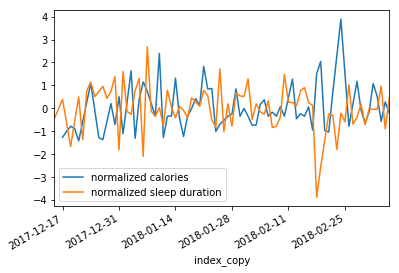

In [515]:
ex.norm_calorie.plot(label="normalized calories")
re2.norm_sleep_duration.plot(label="normalized sleep duration")
plt.legend()
plt.show()

In [517]:
jointdata = pd.merge(re2, ex, left_index=True, right_index=True)

In [518]:
jointdata.head()

,time_offset_x,start_hour_x,end_hour_x,duration,norm_sleep_duration,time_offset_y,calorie,distance,max_speed,start_hour_y,end_hour_y,norm_ex_duration,norm_calorie,exercise_duration
2017-12-17,-5.0,22.516667,6.700000,8.183333,0.395304,-5.0,60.836,872.460,1.722222,16.490278,16.635278,-1.354415,-1.262193,8.690933
2017-12-19,-5.0,22.916667,3.800000,4.883333,-1.667963,-5.0,160.901,0.000,1.722222,15.107222,15.616389,-0.762730,-0.782634,30.272167
2017-12-21,-8.0,3.950000,12.300000,8.350000,0.499509,-8.0,27.645,0.000,1.722222,19.414167,19.501667,-1.450119,-1.421260,5.200200
2017-12-24,-8.0,23.866667,9.250000,9.383333,1.145583,-16.0,553.224,4420.025,5.553222,24.011667,25.089444,0.106150,1.097566,61.963850
2017-12-27,-8.0,1.633333,10.716667,9.083333,0.958013,-8.0,39.610,687.660,1.305556,14.614722,14.797778,-1.291693,-1.363918,10.978650


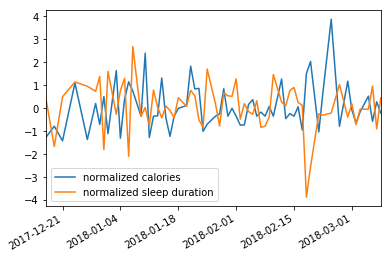

In [519]:
jointdata.norm_calorie.plot(label="normalized calories")
jointdata.norm_sleep_duration.plot(label="normalized sleep duration")
plt.legend()
plt.show()

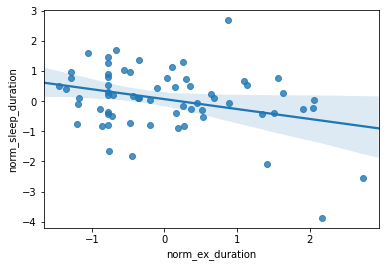

In [524]:
sb.regplot(jointdata.norm_ex_duration, jointdata.norm_sleep_duration)
plt.show()

In [523]:
stats.pearsonr(jointdata.norm_ex_duration, jointdata.norm_sleep_duration)

(-0.32188858308545909, 0.0089283394077802284)